# K-Nearest Neighbor
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Nearest Neighbor** algorithm
- play with the hyperparameter K 
- try KNN on **real-world data**, i.e. the CAPTCHA of a website in ZJU

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [3]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook


%load_ext autoreload
%autoreload 2

### KNN experiment with hyperparameter K

[0. 0. 0. ... 1. 1. 1.]
[0. 0. 0. ... 1. 1. 1.]
[0. 0. 0. ... 1. 1. 1.]


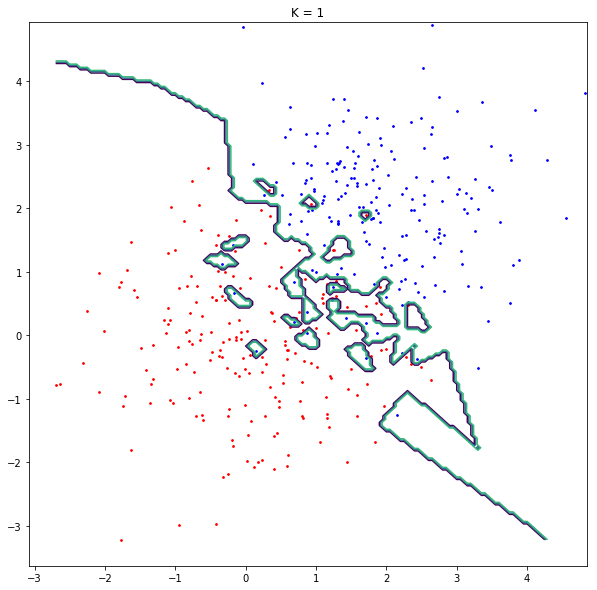

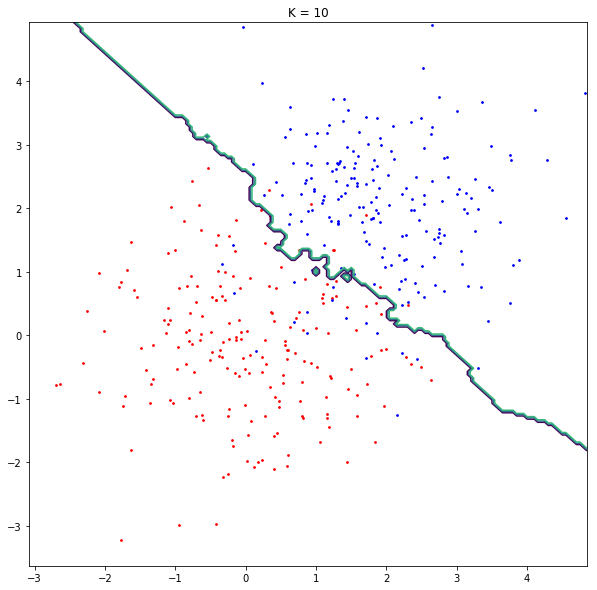

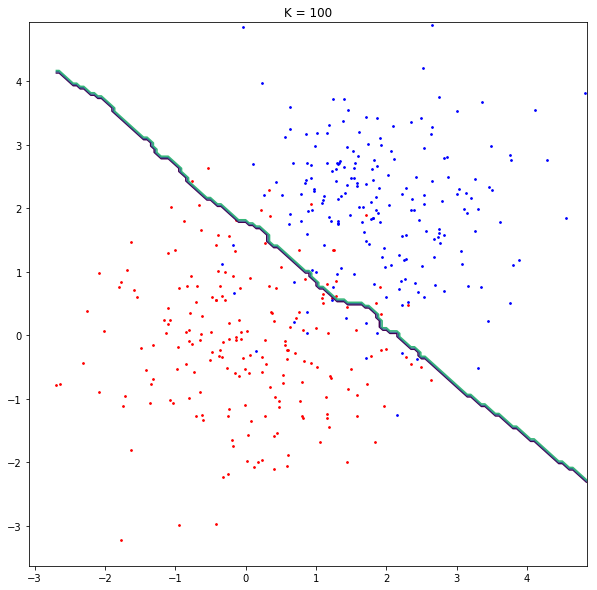

In [51]:
from mkdata import mkdata
from knn_plot import knn_plot

[X, y] = mkdata()

K = [1, 10, 100]
for k in K:
    knn_plot(X, y, k)

### Now Let's hack the website http://jwbinfosys.zju.edu.cn/default2.aspx

In [4]:
from hack import hack
from extract_image import extract_image
from show_image import show_image

(1, 0)
[[255 204 204 ... 255 255 255]
 [204 204 204 ... 153 204 153]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 153 204]
 [204 255 204 ... 255 255 255]
 [204 204 204 ... 204 255 255]]
[0. 1. 0. 3. 0. 1. 2. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 2. 1. 1. 0. 2. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.

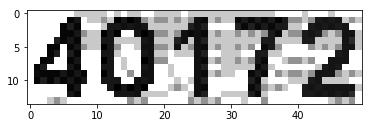

In [40]:
x=np.array([[]])
print(x.shape)
for i in range(1,50):
    test_img = './data/captcha-'+str(i)+'.png' 
    xt = extract_image(test_img)
    show_image(xt)
    if(x.shape[0]==1):
        x = xt
    else:
        x = np.vstack((x, xt))

test_img = './data/captcha-86501.png' 
xt1 = extract_image(test_img)
show_image(xt1)
test_img = './data/captcha-40172.png' 
xt2 = extract_image(test_img)
show_image(xt2)


y= [1,1,6,2,6,
   1,7,2,1,8,
   1,0,3,1,8,
   2,2,5,0,1,
   2,8,4,2,8,
   2,8,8,5,1,
   3,1,6,0,4,
   3,7,2,5,6,
   4,5,5,5,4,
   5,1,3,5,5,
   5,7,5,2,1,
   6,1,1,7,1,
   6,2,3,7,2,
   7,5,2,1,4,
   7,4,3,5,6,
   8,3,1,7,2,
   8,7,2,1,1,
   1,4,2,8,5,
   2,5,5,1,6,
    1,1,4,3,7,
   6,8,3,2,5,
   1,7,0,6,4,
   3,4,4,4,6,
   6,4,7,1,1,
   6,7,2,5,2,
   3,8,6,5,2,
    4,2,3,1,3,
    2,0,0,2,6,
    1,0,5,4,4,
    1,4,5,1,0,
    8,3,0,3,3,
    3,2,1,4,0,
    2,7,7,2,8,
    6,6,6,1,1,
    1,8,8,1,5,
    2,5,8,7,7,
    1,6,2,3,6,
    5,0,6,4,7,
    2,4,0,3,7,
    1,4,7,2,0,
    2,4,0,4,3,
    4,1,7,5,2,
    5,6,8,6,4,
    6,7,7,3,5,
    5,7,4,4,6,
    7,1,4,2,4,
    1,3,4,1,3,
    3,3,4,7,7,
    6,0,1,1,5,
    5,8,2,8,0
   ]

np.savez('hack_data.npz',x ,y)

r1 = hack(xt1)
print(r1)
r2 = hack(xt2)
print(r2)